# Problem set 1: Printing and plotting

**Learning goals**:

- Printing to screen, `print`
- Write to and read from text files, `.write` and `.read`
- Plot 2D figures using `.plot` in  `matplotlib`
- Plot 3D figures using `.plot_surface` in `matplotlib` with `np.meshgrid` and `projection='3d'`

**Table of contents**<a id='toc0_'></a>    
- 1. [Define function](#toc1_)    
- 2. [Print to screen (table)](#toc2_)    
- 3. [Write the output to `table_output.txt`](#toc3_)    
- 4. [Read `table_output.txt` and print content to screen](#toc4_)    
- 5. [2D plot indifference curves](#toc5_)    
- 6. [3D plot of utility function](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Imports you will need:

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from matplotlib import cm # for colormap

# predefine options for all plots
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'-'})
plt.rcParams.update({'font.size': 14})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

**Note:** Answers are in A*.py files.

## 1. <a id='toc1_'></a>[Define function](#toc0_)

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

where `x1` and `x2` are *positional arguments*, and `alpha`and `beta` are *keyword arguments* with default arguments $\alpha=0.5$ and $\beta=1$.

In [17]:
# write your own code here
def u_func(x1, x2, alpha=0.5, beta=1.0):
    return (alpha * x1**(-beta) + (1 - alpha) * x2**(-beta))**(-1 / beta)

## 2. <a id='toc2_'></a>[Print to screen (table)](#toc0_)

In [3]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `gen_table(x1_vec,x2_vec,u_func)` to print values of `u(x1,x2)` in the table form shown below.

In [19]:
# update this code

def gen_table(x1_vec,x2_vec,u_func):
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}'
    for j, x2 in enumerate(x2_vec):
       text += f'{j:6d}' 
    text += '\n' # line shift
    
    # c. body
    for i, x1 in enumerate(x1_vec):
        text += f'{i:6d}' # Integer with 6 spaces
        for j, x2 in enumerate(x2_vec):
            text += f'{round(u_func(x1_vec[i], x2_vec[j]),4):6.3f}' # Float with 6 spaces and 3 decimals
        text += '\n' # line shift
        
    # d. print
    return text

table = gen_table(x1_vec,x2_vec, u_func)
print(table)

        0     1     2     3     4
     0 1.050 1.162 1.442 1.479 1.569
     1 1.162 1.300 1.661 1.710 1.832
     2 1.442 1.661 2.300 2.396 2.641
     3 1.479 1.710 2.396 2.500 2.768
     4 1.569 1.832 2.641 2.768 3.100



In [5]:
from A1 import u_func as u_func_answer
from A2 import gen_table as gen_table_answer
print(gen_table_answer(x1_vec,x2_vec,u_func_answer))

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832
  2  1.442 1.661 2.300 2.396 2.641
  3  1.479 1.711 2.396 2.500 2.768
  4  1.569 1.832 2.641 2.768 3.100


## 3. <a id='toc3_'></a>[Write the output to `table_output.txt`](#toc0_)

In [21]:
# write your code here
with open('table_output.txt', 'w') as f: # open a file for writing
    f.write(f'{gen_table(x1_vec,x2_vec,u_func)}')

## 4. <a id='toc4_'></a>[Read `table_output.txt` and print content to screen](#toc0_)

In [22]:
# write your code here
with open('table_output.txt', 'r') as f: # open a file for reading
    table_output = f.read()
    print(table_output)

        0     1     2     3     4
     0 1.050 1.162 1.442 1.479 1.569
     1 1.162 1.300 1.661 1.710 1.832
     2 1.442 1.661 2.300 2.396 2.641
     3 1.479 1.710 2.396 2.500 2.768
     4 1.569 1.832 2.641 2.768 3.100



## 5. <a id='toc5_'></a>[2D plot indifference curves](#toc0_)

The formula for the indifference curves of $u(x_1,x_2)$ is:

$$
x_2(x_1, u) = \left( \frac{u^{-\beta} - \alpha x_1^{-\beta}}{1-\alpha} \right)^{-1/\beta}
$$

for 

$$
\log(x_1) > \log(u) + \log(\alpha)/\beta
$$

Produce a figure like the one below and save to disc.

In [8]:
# these values were used
alpha = 0.5 
betas = [0.25, 1.0, 4.0]
uvals = [1.5, 2.0, 2.5] # values of u

# write your code here

def x2_func(x1,u,alpha=0.5,beta=1.0):
    pass

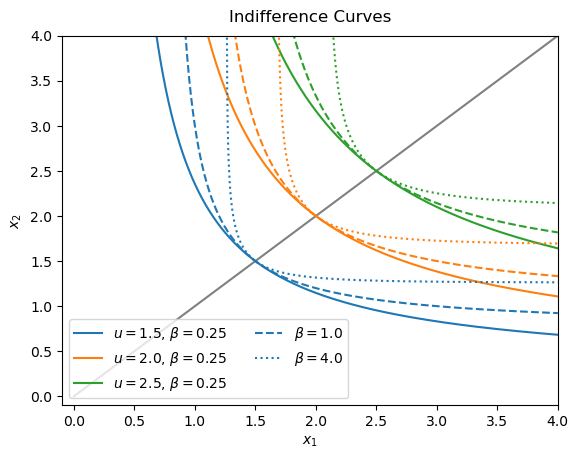

In [9]:
import A5
A5.plot(alpha,betas,uvals)

**Hint:** To check your implementation of `x2(x1,u,alpha,beta)` you can use the code below.

In [10]:
# x1_ = 2.0
# x2_ = 1.5
# u_ = u_func(x1_,x2_,alpha=alpha,beta=betas[0])
# x2_implied = x2_func(x1_,u_,alpha=alpha,beta=betas[0])
# assert np.isclose(x2_,x2_implied)

## 6. <a id='toc6_'></a>[3D plot of utility function](#toc0_)

Reproduce the figures below of $u(x_1,x_2)$ using:

1. the `meshgrid` function from *numpy* 
1. the `.plot_surface` and `.plot` axis methods from *matplotlib*.

where the black lines are indifference curves for $u \in \{1,2,3\}$.

**Hint:** You can look at the documentation.

In [11]:
#?np.meshgrid

In [12]:
# these values were used
alpha = 0.75
beta = 0.5
x1_vec = np.linspace(0.1,4,1000)
x2_vec = np.linspace(0.1,4,1000)
uvals = [1.0,2.0,3.0]

# write your code here

# x1_grid,x2_grid = 
# u_grid = 

NameError: name 'np' is not defined

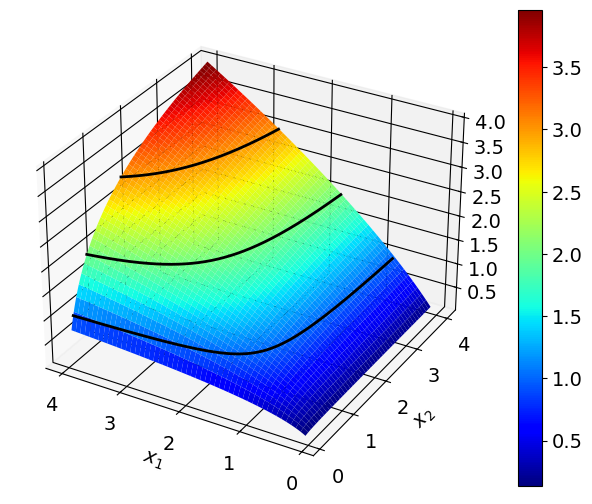

In [ ]:
import A6
A6.plot(x1_vec,x2_vec,alpha,beta,uvals)